In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import zipfile

In [3]:
data = pd.read_csv(r'E:\epic\twitter_training.csv\twitter_training.csv')
data.head(), data.columns

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
 Index(['2401', 'Borderlands', 'Positive',
        'im getting on borderlands and i will murder you all ,'],
       dtype='object'))

In [4]:
# Rename columns for clarity
data.columns = ['Index', 'Topic', 'Sentiment', 'Tweet']

In [5]:
# Drop the unnecessary index column
data = data.drop(columns=['Index'])

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

In [7]:
data.head(), missing_values

(         Topic Sentiment                                              Tweet
 0  Borderlands  Positive  I am coming to the borders and I will kill you...
 1  Borderlands  Positive  im getting on borderlands and i will kill you ...
 2  Borderlands  Positive  im coming on borderlands and i will murder you...
 3  Borderlands  Positive  im getting on borderlands 2 and i will murder ...
 4  Borderlands  Positive  im getting into borderlands and i can murder y...,
 Topic          0
 Sentiment      0
 Tweet        686
 dtype: int64)

# Analyzed

In [8]:
# Remove rows with missing tweets
data_cleaned = data.dropna(subset=['Tweet'])

In [9]:
# Verify that there are no more missing values in the Tweet column
missing_values_after_cleaning = data_cleaned.isnull().sum()

In [10]:
# Display the first few rows of the cleaned dataset and the updated missing values count
data_cleaned.head(), missing_values_after_cleaning

(         Topic Sentiment                                              Tweet
 0  Borderlands  Positive  I am coming to the borders and I will kill you...
 1  Borderlands  Positive  im getting on borderlands and i will kill you ...
 2  Borderlands  Positive  im coming on borderlands and i will murder you...
 3  Borderlands  Positive  im getting on borderlands 2 and i will murder ...
 4  Borderlands  Positive  im getting into borderlands and i can murder y...,
 Topic        0
 Sentiment    0
 Tweet        0
 dtype: int64)

In [11]:
# Set the style of the visualization
sns.set(style="whitegrid")

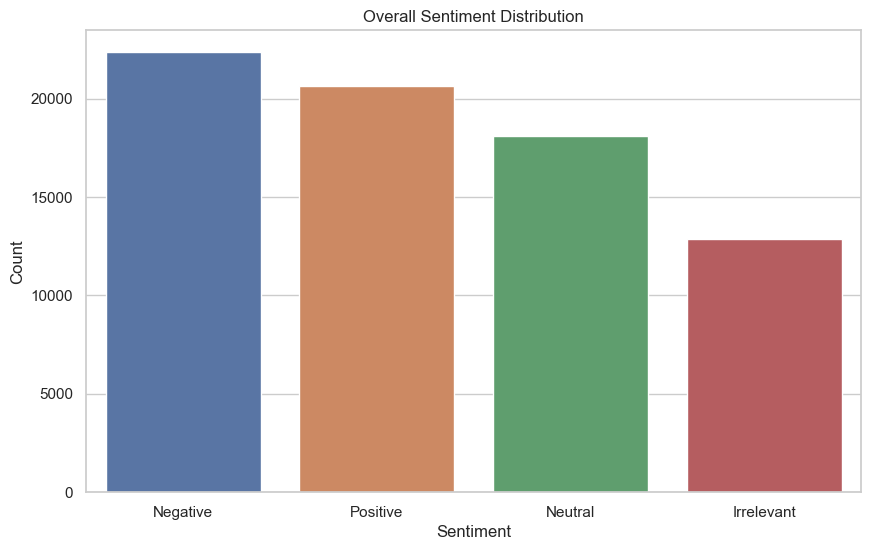

In [12]:
# Plot the overall sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Sentiment', order=data_cleaned['Sentiment'].value_counts().index)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
# Set the style of the visualization
sns.set(style="whitegrid")

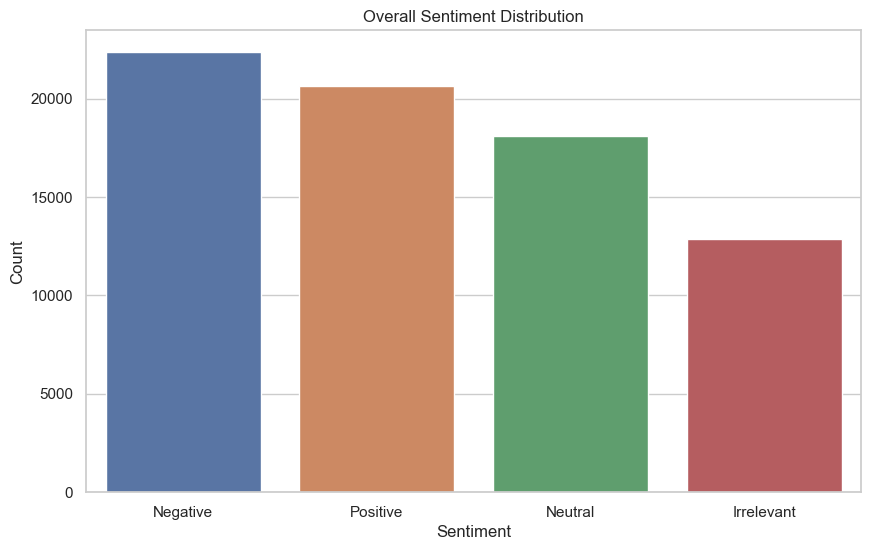

In [14]:
# Plot the overall sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Sentiment', order=data_cleaned['Sentiment'].value_counts().index)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment Distribution

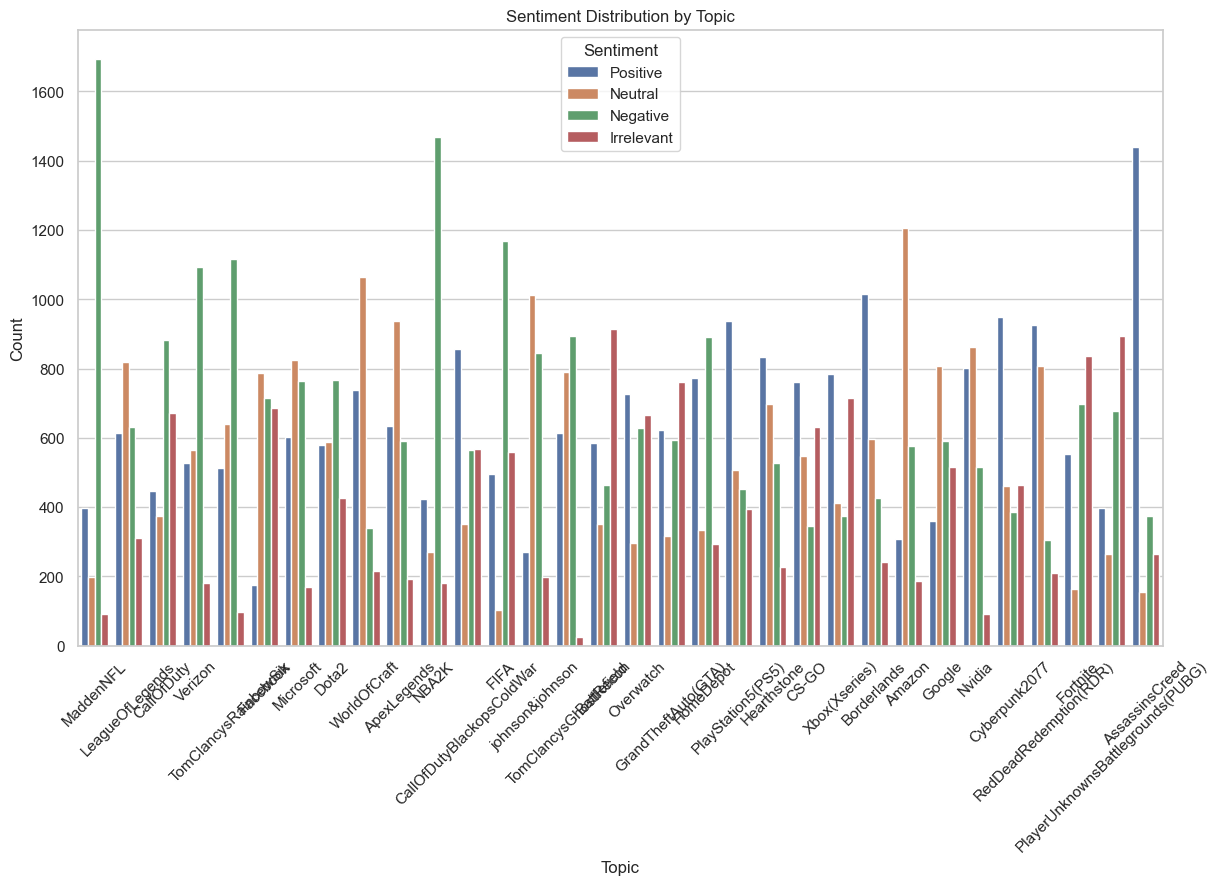

In [15]:
# Plot the sentiment distribution for each topic
plt.figure(figsize=(14, 8))
sns.countplot(data=data_cleaned, x='Topic', hue='Sentiment', order=data_cleaned['Topic'].value_counts().index)
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Sentiments


In [17]:
!pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 529.7 kB/s eta 0:00:00


In [18]:
from wordcloud import WordCloud

In [19]:
# Function to plot word cloud
def plot_word_cloud(data, title):
    wordcloud = WordCloud(width=800, height=400, max_words=200).generate(' '.join(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [20]:
# Generate word clouds for each sentiment
positive_tweets = data_cleaned[data_cleaned['Sentiment'] == 'Positive']['Tweet']
negative_tweets = data_cleaned[data_cleaned['Sentiment'] == 'Negative']['Tweet']
neutral_tweets = data_cleaned[data_cleaned['Sentiment'] == 'Neutral']['Tweet']

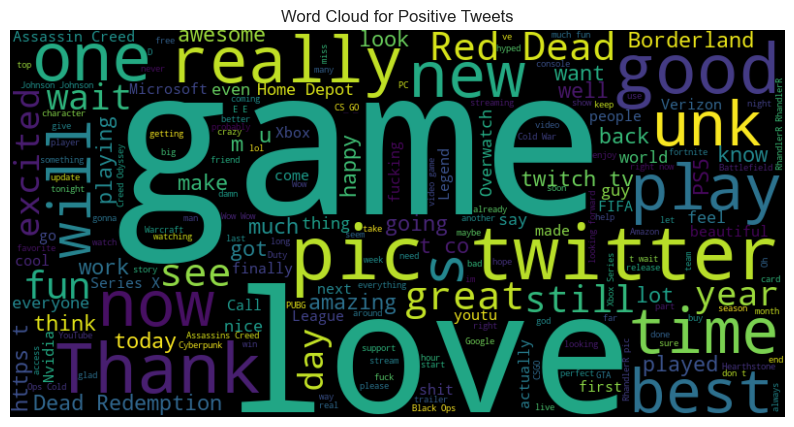

In [21]:
plot_word_cloud(positive_tweets, 'Word Cloud for Positive Tweets')

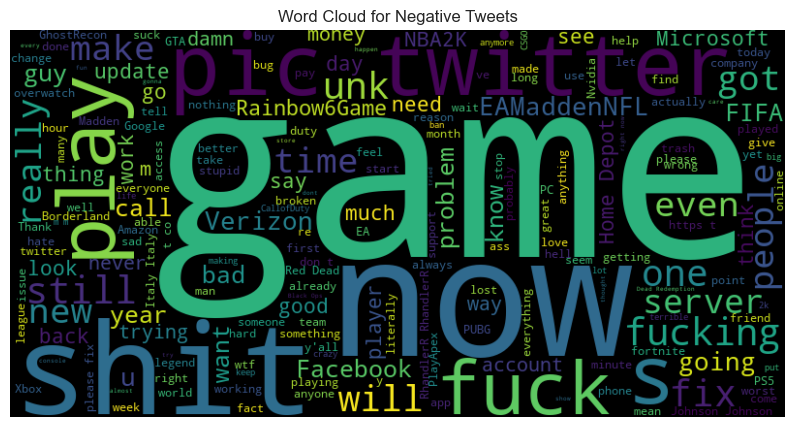

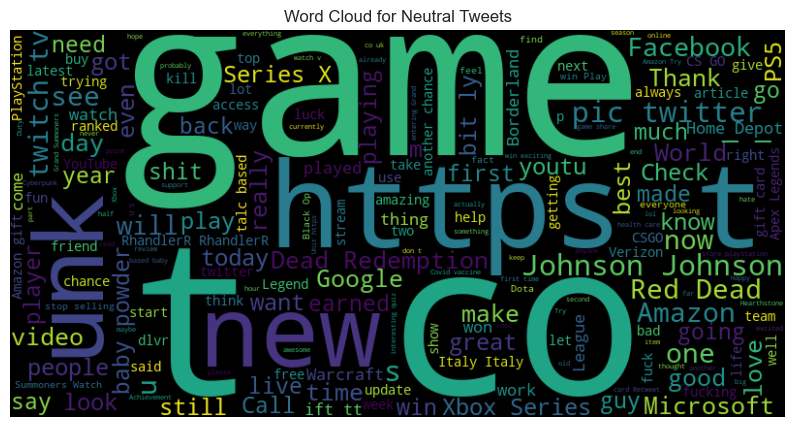

In [22]:
plot_word_cloud(negative_tweets, 'Word Cloud for Negative Tweets')
plot_word_cloud(neutral_tweets, 'Word Cloud for Neutral Tweets')

In [25]:
print(data_cleaned.columns)

Index(['Topic', 'Sentiment', 'Tweet'], dtype='object')


In [26]:
# Calculate the proportion of each sentiment per topic
sentiment_proportion_by_topic = data_cleaned.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)
sentiment_proportion_by_topic = sentiment_proportion_by_topic.div(sentiment_proportion_by_topic.sum(axis=1), axis=0)

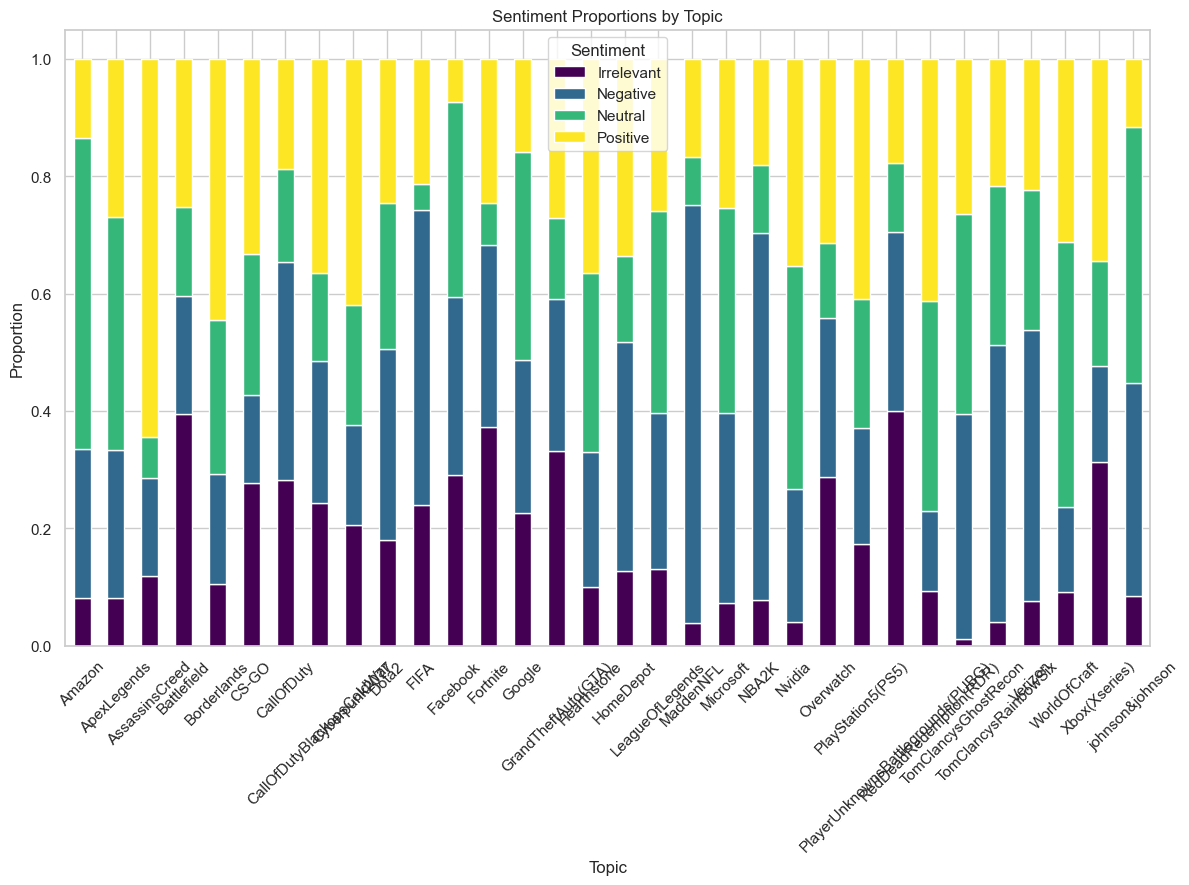

In [27]:
# Plot sentiment proportions by topic
sentiment_proportion_by_topic.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Sentiment Proportions by Topic')
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Create a pivot table of sentiment counts for each topic
heatmap_data = data_cleaned.pivot_table(index='Topic', columns='Sentiment', aggfunc='size', fill_value=0)

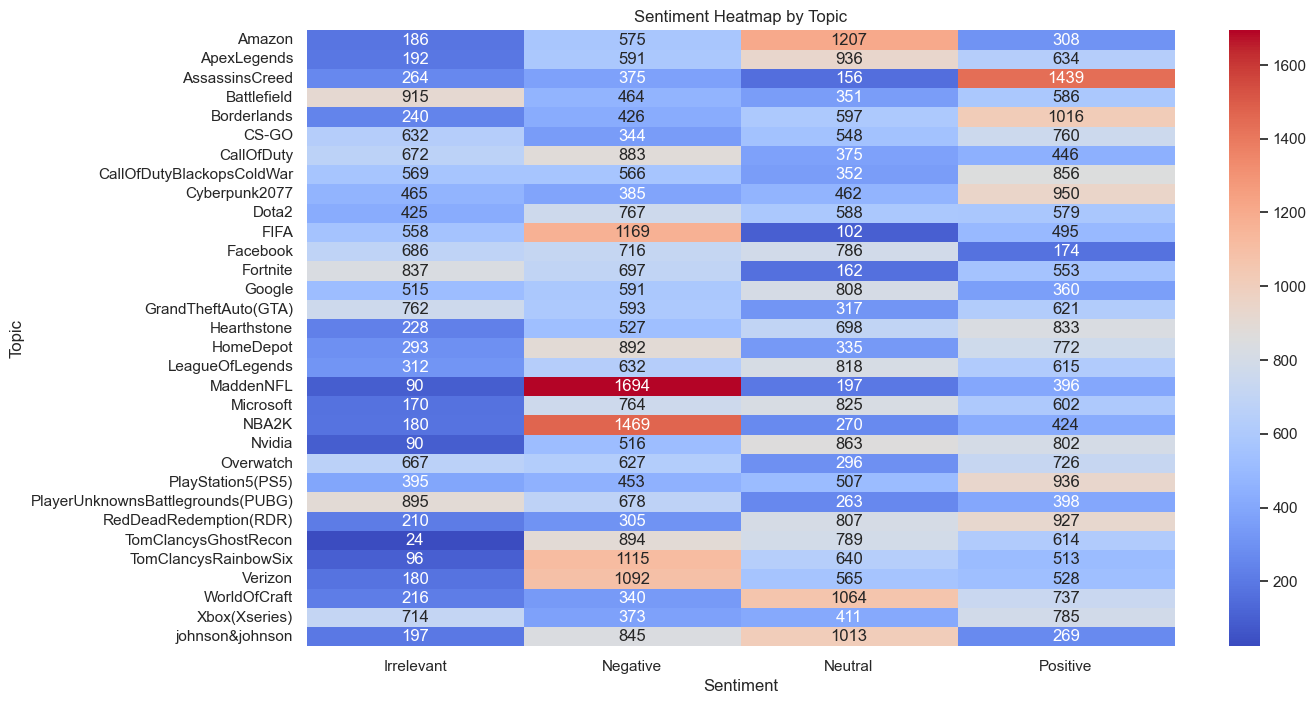

In [29]:
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Sentiment Heatmap by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()